# **Datascience_project1**

# [ 목차 ]

> ### 1. Data 소개
> ### 2. Data 불러온 후 확인
> ### 3. 전처리
>> #### 3-1. 결측치 정제
>> #### 3-2. 이상치 다루기
> ### 4. 수면 건강에 영향을 주는 요인들
>> #### 4-1. 수면 지속 시간, 수면의 질과 스트레스 지수 관계
>> #### 4-2. 수면 지속 시간, 수면의 질과 수면 장애 관계
> ### 5. 신체 건강이 수면 건강에 주는 영향
>> #### 5-1. 신체활동과 수면 건강 관계
>> #### 5-2. BMI와 수면장애 관계
> ### 6. 결론

# 1. Data 소개

| 본 데이터('Sleep Health and Lifestyle Dataset')sms 374개의 행과 13개의 열로 구성되어 있으며, 수면 및 일상 습관과 관련된 광범위한 변수를 다룬다. attribute에는 성별, 연령, 직업, 수면 지속 시간, 수면의 질, 신체 활동 수준, 스트레스 지수, BMI 범주, 혈압, 심박수, 일상 스텝 및 수면 장애 유무와 같은 세부 정보를 포함한다.

자료 출처 : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

<strong> 1) 주요 특징 </strong>

- 종합 수면 지표 : 수면 지속 시간, 수면의 질, 수면 패턴에 영향을 미치는 요인 탐색
- 생활 습관 요인 : 신체 활동 수준, 스트레스 지수, BMI 범주 분석
- 심혈관 건강 : 혈압과 심박수 측정 검사
- 수면 장애 분석 : 불면증, 수면 무호흡증 등 수면 장애 발생 파악

<strong> 2) attribute 설명 </strong>

- Person ID : 개인 식별자
- Gender (Male/Female) : 해당 인물의 성별
- Age : 해당 인물의 나이
- Occupation : 해당 인물의 직업
- Sleep Duration : 하루에 자는 시간
- Quality of Sleep (1~10) : 수면의 질에 대한 주관적 평가
- Physical Activity Level : 하루 동안 신체활동에 참여하는 시간
- Stress Level (1~10) : 해당 인물이 경험한 스트레스 지수에 대한 주관적 평가
- BMI Category : 해당 인물의 BMI 범주
- Blood Pressure : 해당 인물의 혈압 측정값
- Heart Rate (bpm) : 분당 박동수에서 해당 인물의 휴식 심박수
- Daily Steps : 해당 인물이 하루에 수행하는 걸음 수
- Sleep Disorder : 해당 인물의 수면 장애 유무

# 2. Data 불러온 후 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [2]:
# 파일 불러오기
df = pd.read_csv("Sleep_health_and_lifestyle_dataset_final.csv")

In [3]:
# 데이터 상위 10개 표시
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
1,2,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,None
2,3,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
3,4,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
4,5,Male,37,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,None
5,6,Male,41,Lawyer,7.1,7,55,6,Overweight,125/82,72,6000,None
6,7,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
7,8,Male,35,Software Engineer,7.5,8,60,5,Normal,120/80,70,8000,None
8,9,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,Sleep Apnea
9,10,Female,53,Engineer,8.4,9,30,3,Normal,125/80,65,5000,NaN


In [4]:
# 차원 확인
df.shape

(374, 13)

In [5]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           333 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
# 결측치 확인
df.isnull().sum()

Person ID                   0
Gender                      0
Age                         0
Occupation                  0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
BMI Category                0
Blood Pressure              0
Heart Rate                  0
Daily Steps                 0
Sleep Disorder             41
dtype: int64

##### 'Person ID', 'Gender', 'Occupation', 'Age', 'Blood Pressure' 열 제거

In [7]:
# 필요없는 열 제거
df = df.drop(['Person ID', 'Gender', 'Occupation', 'Age', 'Blood Pressure'], axis = 1)

In [8]:
df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,6.3,6,45,7,Overweight,72,6000,Insomnia
1,7.7,8,90,5,Normal,70,8000,None
2,5.8,4,32,8,Overweight,81,5200,Sleep Apnea
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea
4,7.4,8,60,5,Normal,68,8000,None
...,...,...,...,...,...,...,...,...
369,6.5,5,40,7,Normal,80,4000,Insomnia
370,7.2,8,60,5,Normal,68,8000,None
371,8.1,9,75,3,Overweight,68,7000,Sleep Apnea
372,7.2,8,55,6,Normal,73,7300,None


# 3. 전처리

## 3-1. 결측치 정제

In [9]:
# 각 column별로 결측치가 얼마만큼의 퍼센트를 차지하는지 확인
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Sleep Disorder             10.962567
Sleep Duration              0.000000
Quality of Sleep            0.000000
Physical Activity Level     0.000000
Stress Level                0.000000
BMI Category                0.000000
Heart Rate                  0.000000
Daily Steps                 0.000000
dtype: float64

In [10]:
# 결측치 있는 행 전부 del
df = df.dropna(axis=0)

In [11]:
df.shape

(333, 8)

In [12]:
df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,6.3,6,45,7,Overweight,72,6000,Insomnia
1,7.7,8,90,5,Normal,70,8000,None
2,5.8,4,32,8,Overweight,81,5200,Sleep Apnea
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea
4,7.4,8,60,5,Normal,68,8000,None
...,...,...,...,...,...,...,...,...
369,6.5,5,40,7,Normal,80,4000,Insomnia
370,7.2,8,60,5,Normal,68,8000,None
371,8.1,9,75,3,Overweight,68,7000,Sleep Apnea
372,7.2,8,55,6,Normal,73,7300,None


## 3-2. 이상치 다루기

In [13]:
# 사분위수(Quartiles) 사용
lower = df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25)) # 하한선 
upper = df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25)) # 상한선

# column 별 이상치 개수 확인
print(((df < lower) | (df > upper)).sum())

BMI Category                0
Daily Steps                 0
Heart Rate                 15
Physical Activity Level     0
Quality of Sleep            0
Sleep Disorder              0
Sleep Duration              0
Stress Level                0
dtype: int64


C:\Users\eun04\AppData\Local\Temp\ipykernel_38404\2508743669.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lower = df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25)) # 하한선
C:\Users\eun04\AppData\Local\Temp\ipykernel_38404\2508743669.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upper = df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25)) # 상한선
C:\Users\eun04\AppData\Local\Temp\ipykernel_38404\2508743669.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `lef

##### 'Heart Rate' 이상치 제거

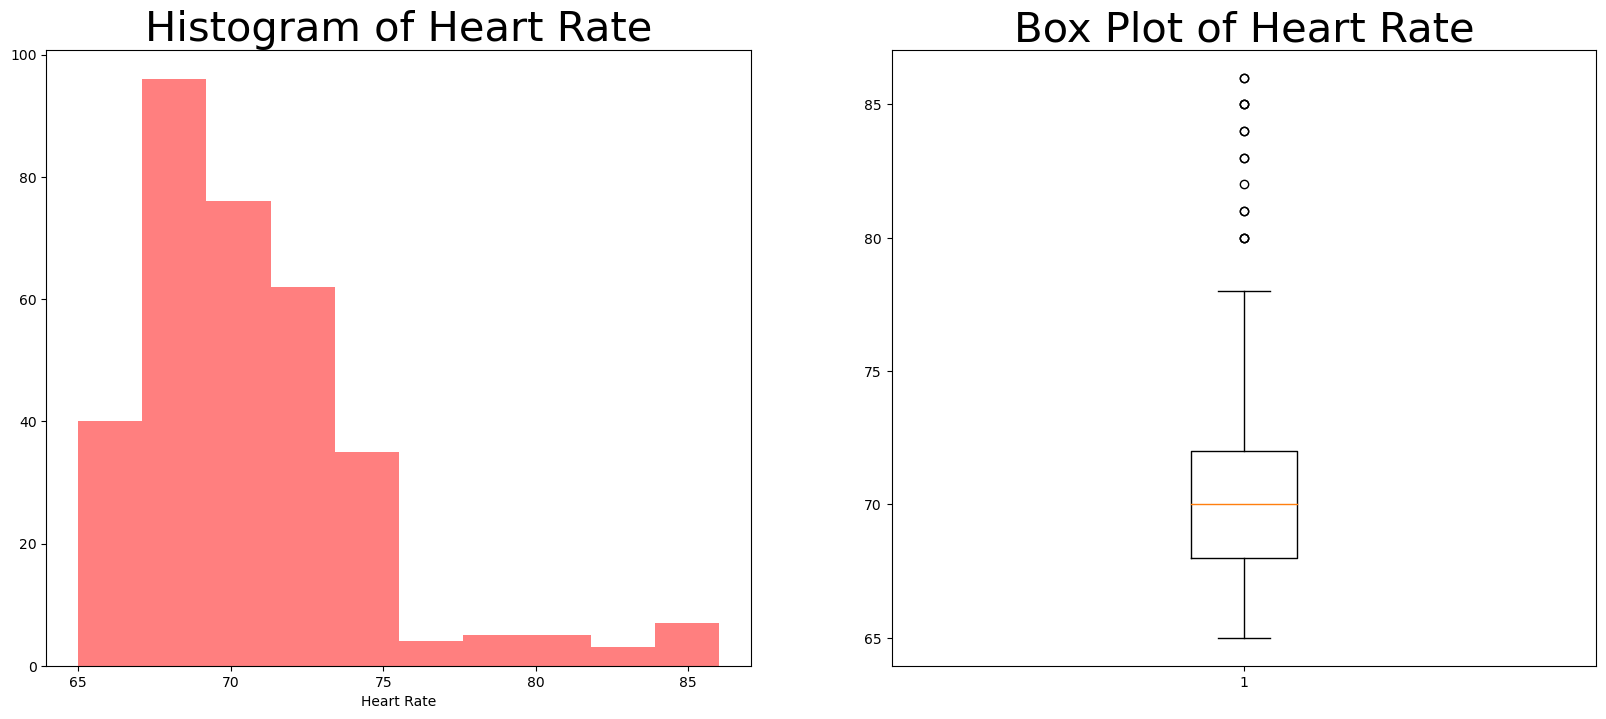

In [14]:
# Histogram, Box plot으로 'Heart Rate' 분포 확인
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.hist(df['Heart Rate'], color='red', alpha=0.5)
ax1.set_title('Histogram of Heart Rate', fontsize = 30)
ax1.set_xlabel('Heart Rate')

ax2.boxplot(df['Heart Rate'])
ax2.set_title('Box Plot of Heart Rate', fontsize = 30)

plt.show()

In [15]:
Q3 = np.percentile(df['Heart Rate'], 75)
Q1 = np.percentile(df['Heart Rate'], 25)

IQR = Q3 - Q1

# 'Heart Rate' 이상치 있는 행 전부 확인
df[(Q1-1.5*IQR > df['Heart Rate'])|(Q3+1.5*IQR < df['Heart Rate'])]

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
2,5.8,4,32,8,Overweight,81,5200,Sleep Apnea
28,7.3,7,65,5,Overweight,83,3500,Insomnia
109,7.3,7,65,5,Overweight,83,3500,Insomnia
116,5.9,4,30,8,Overweight,85,3000,Insomnia
143,5.9,4,30,8,Overweight,85,3000,Sleep Apnea
177,6.3,6,40,7,Overweight,82,3500,Insomnia
193,6.5,5,40,7,Normal,80,4000,Sleep Apnea
220,7.4,7,60,5,Overweight,84,3300,Sleep Apnea
241,5.9,4,30,8,Overweight,85,3000,Sleep Apnea
305,8.1,9,85,3,Overweight,86,3700,Sleep Apnea


In [16]:
# 'Heart Rate' 열에 대해 이상치 여부 판별 함수
def is_HR_outlier(df) :
    DS_count = df['Heart Rate']
    if DS_count > Q3 + 1.5*IQR or DS_count < Q1 - 1.5*IQR :
        return True 
    else :
        return False

# apply 함수를 사용해, 이상치 여부를 찾고 새로운 열에 결과 저장
df['Heart Rate_outlier'] = df.apply(is_HR_outlier, axis=1)

df

C:\Users\eun04\AppData\Local\Temp\ipykernel_38404\2374584887.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Heart Rate_outlier'] = df.apply(is_HR_outlier, axis=1)


,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Heart Rate_outlier
0,6.3,6,45,7,Overweight,72,6000,Insomnia,False
1,7.7,8,90,5,Normal,70,8000,None,False
2,5.8,4,32,8,Overweight,81,5200,Sleep Apnea,True
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,False
4,7.4,8,60,5,Normal,68,8000,None,False
...,...,...,...,...,...,...,...,...,...
369,6.5,5,40,7,Normal,80,4000,Insomnia,True
370,7.2,8,60,5,Normal,68,8000,None,False
371,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,False
372,7.2,8,55,6,Normal,73,7300,None,False


In [17]:
# 'Heart Rate' 이상치 제거
df = df.loc[df['Heart Rate_outlier'] == False]

df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Heart Rate_outlier
0,6.3,6,45,7,Overweight,72,6000,Insomnia,False
1,7.7,8,90,5,Normal,70,8000,None,False
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,False
4,7.4,8,60,5,Normal,68,8000,None,False
5,7.1,7,55,6,Overweight,72,6000,None,False
...,...,...,...,...,...,...,...,...,...
368,6.1,6,90,8,Overweight,75,10000,Sleep Apnea,False
370,7.2,8,60,5,Normal,68,8000,None,False
371,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,False
372,7.2,8,55,6,Normal,73,7300,None,False


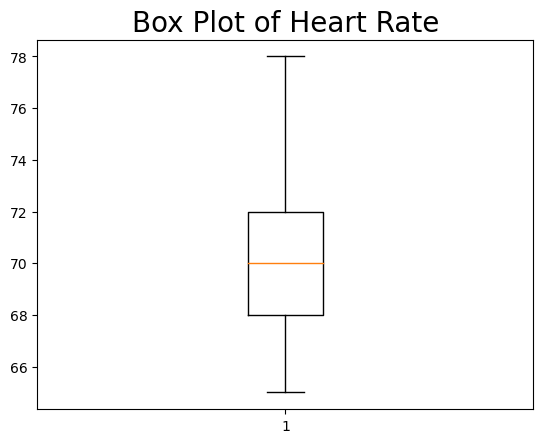

In [18]:
# 'Heart Rate' 이상치가 제거되었는지 boxplot으로 확인
plt.boxplot(df['Heart Rate'])
plt.title('Box Plot of Heart Rate', fontsize = 20)

plt.show()

In [19]:
# 'Heart Rate_outlier' 열 삭제
df = df.drop(['Heart Rate_outlier'], axis = 1)

df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,6.3,6,45,7,Overweight,72,6000,Insomnia
1,7.7,8,90,5,Normal,70,8000,None
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea
4,7.4,8,60,5,Normal,68,8000,None
5,7.1,7,55,6,Overweight,72,6000,None
...,...,...,...,...,...,...,...,...
368,6.1,6,90,8,Overweight,75,10000,Sleep Apnea
370,7.2,8,60,5,Normal,68,8000,None
371,8.1,9,75,3,Overweight,68,7000,Sleep Apnea
372,7.2,8,55,6,Normal,73,7300,None


# 4. 수면 건강에 영향을 주는 요인들

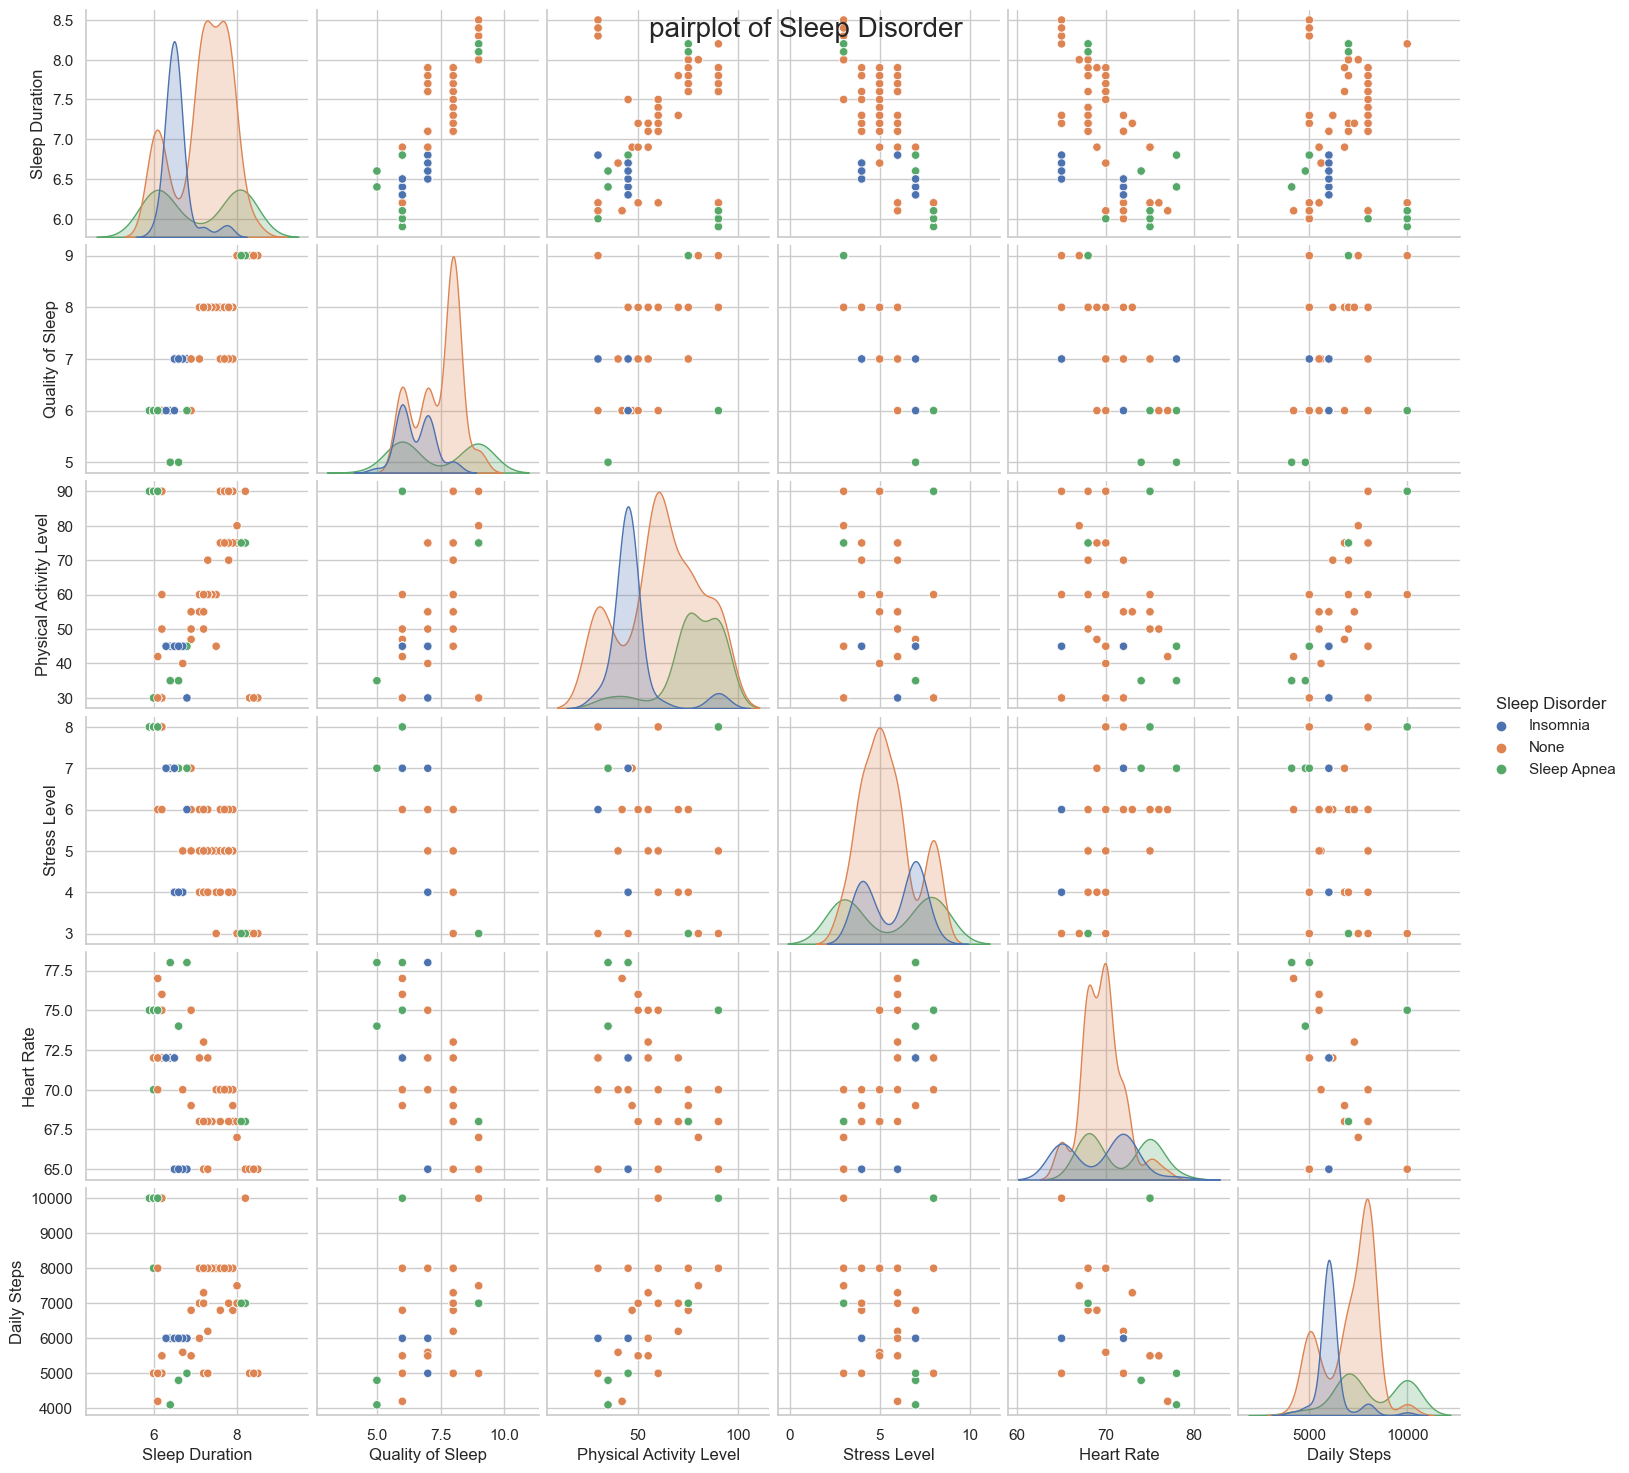

In [20]:
sns.set(style="whitegrid")

p1 = sns.pairplot(df, hue='Sleep Disorder')
p1.fig.suptitle("pairplot of Sleep Disorder", fontsize = 20)

plt.show()

## 4-1. 수면 지속 시간, 수면의 질과 스트레스 지수 관계

### : 'Sleep Duration', 'Quality of Sleep' & 'Stress Level'을 이용해 상관관계 파악

##### 1) 사용할 value('Sleep Duration', 'Quality of Sleep', 'Stress Level') 확인

In [21]:
# 'Sleep Duration' value 개수 출력
df['Sleep Duration'].value_counts()

7.2    36
6.0    30
7.8    28
7.7    24
6.1    23
6.5    21
7.1    18
6.6    16
8.0    13
6.3    12
6.2    12
7.3    12
8.1    11
8.2    10
7.6    10
6.4     9
7.9     7
6.8     5
7.5     5
6.7     5
7.4     3
6.9     3
8.4     2
5.9     1
8.3     1
8.5     1
Name: Sleep Duration, dtype: int64

In [22]:
# 'Quality of Sleep' value 개수 출력
df['Quality of Sleep'].value_counts()

8    109
6    101
7     66
9     38
5      4
Name: Quality of Sleep, dtype: int64

In [23]:
# 'Stress Level' value 개수 출력
df['Stress Level'].value_counts()

4    68
5    63
8    62
6    45
7    40
3    40
Name: Stress Level, dtype: int64

##### 2) 'Sleep Duration'과 'Quality of Sleep'의 Cosine Similarity 계산

In [24]:
# 'Sleep Duration'과 'Quality of Sleep' 간의 Consie Similarity 계산
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

d1 = np.array(df[['Sleep Duration']])
d2 = np.array(df[['Quality of Sleep']])
result = cosine_similarity(d1.reshape(1, -1), d2.reshape(1, -1))
print(result)

[[0.99698681]]


- 수면 지속 시간과 수면의 질 간의 코사인 거리를 계산해보니 높은 유사도 값이 도출되었다.

=> 즉, 수면 지속 시간이 길수록 수면의 질이 높아짐을 알 수 있다.

##### 3) 'Sleep Duration', 'Quality of Sleep'과 'Stress Level' 간의 Correlation 계산

In [25]:
# 'Sleep Duration'과 'Stress Level'간 Correlation
specific_corr = df['Sleep Duration'].corr(df['Stress Level'])
print(specific_corr)

-0.7518813777977027


수면 지속 시간과 스트레스 지수는 음의 상관관계를 나타낸다.

즉, 두 변수는 강한 반비례 관계를 나타냄을 의미한다.

In [26]:
# 'Quality of Sleep'과 'Stress Level' 간 Correlation
specific_corr = df['Quality of Sleep'].corr(df['Stress Level'])
print(specific_corr)

-0.8924190114668634


수면의 질과 스트레스 지수는 음의 상관관계를 나타낸다.

즉, 두 변수는 강한 반비례 관계를 나타냄을 의미한다.

=> 계산한 상관계수 값을 비교해보면, 수면 지속 시간보다 수면의 질이 스트레스 지수와 더 강한 관계임을 확인할 수 있다.

##### 4) 'Sleep Duration', 'Quality of Sleep' & 'Stress Level' 관계 시각화

In [27]:
# 'Quality of Sleep' value 범주화
data_sample = df['Quality of Sleep']
df['Quality'] = pd.cut(df['Quality of Sleep'], bins=[3, 4, 5, 6, 7, 8, 9], labels=[4, 5, 6, 7, 8, 9], include_lowest=True)

df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
0,6.3,6,45,7,Overweight,72,6000,Insomnia,6
1,7.7,8,90,5,Normal,70,8000,None,8
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,6
4,7.4,8,60,5,Normal,68,8000,None,8
5,7.1,7,55,6,Overweight,72,6000,None,7
...,...,...,...,...,...,...,...,...,...
368,6.1,6,90,8,Overweight,75,10000,Sleep Apnea,6
370,7.2,8,60,5,Normal,68,8000,None,8
371,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,9
372,7.2,8,55,6,Normal,73,7300,None,8


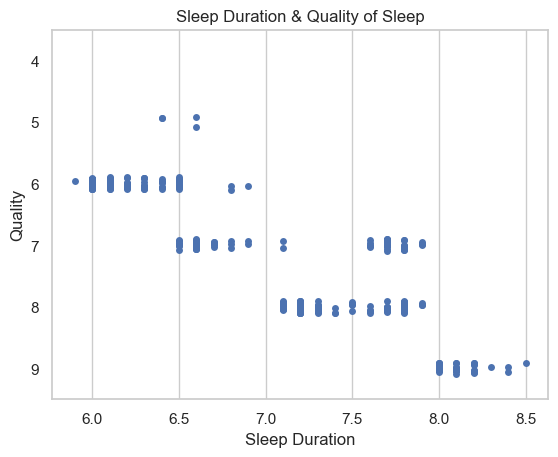

In [28]:
# 'Sleep Duration' & 'Quality of Sleep'
sns.set(style="whitegrid")
p1 = sns.stripplot(x="Sleep Duration", y="Quality", data=df)
p1.set_title("Sleep Duration & Quality of Sleep")

plt.show()

시각화를 통해 수면 지속 시간이 길수록 수면의 질이 높아짐을 확인할 수 있다.

=> 따라서, 코사인 거리 값과 시각화에 따라 수면 지속 시간과 수면의 질은 유사하다는 것을 의미한다.

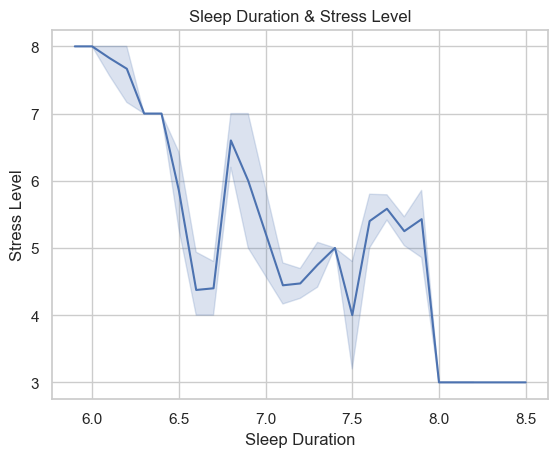

In [29]:
# 'Sleep Duration' & 'Stress Level'
p2 = sns.lineplot(x = 'Sleep Duration', y = 'Stress Level', data=df)
p2.set_title("Sleep Duration & Stress Level")
plt.show()

수면 지속 시간이 길더라도 스트레스 지수가 높을 수 있다.

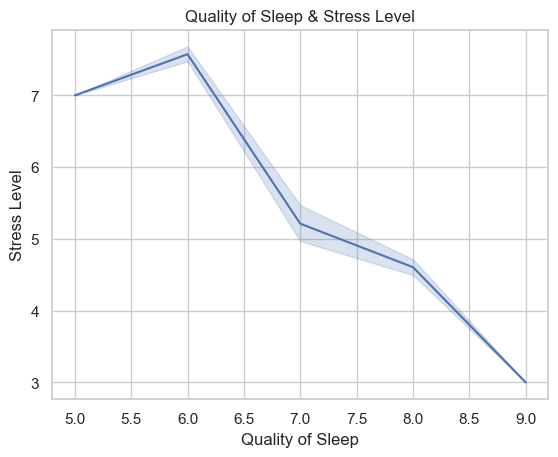

In [30]:
# 'Quality of Sleep' & 'Stress Level'
p3 = sns.lineplot(x = 'Quality of Sleep', y = 'Stress Level', data=df)
p3.set_title("Quality of Sleep & Stress Level")
plt.show()

수면의 질이 높을수록 스트레스 지수가 낮아지는 경향을 보인다.

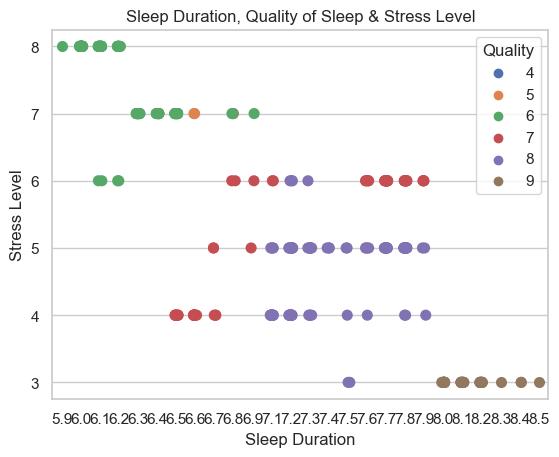

In [31]:
# 'Sleep Duration', 'Quality of Sleep' & 'Stress Level'
sns.set(style="whitegrid")
p4 = sns.stripplot(x=df['Sleep Duration'], y=df['Stress Level'], hue=df['Quality'], size=8, jitter=True)
p4.set_title("Sleep Duration, Quality of Sleep & Stress Level")
plt.show()

시각화를 통해 보편적인 경우, 수면 지속 시간이 길고, 수면의 질이 높을수록 스트레스 지수가 낮아진다는 사실을 확인할 수 있다.

하지만, 수면 지속 시간과 스트레스 지수 두 개의 변수만 비교했을 경우, 두 값이 항상 반비례하지 않음을 확인할 수 있다.

##### 5) 'Quality of Sleep' 범주 별 'Stress Level' 관계 시각화

In [32]:
# 'Quality of Sleep' 열에서 값이 5인 value의 행만 추출
quality_5 = df.loc[df['Quality of Sleep'] == 5]
quality_5

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
20,6.6,5,35,7,Overweight,74,4800,Insomnia,5
60,6.4,5,35,7,Normal,78,4100,Insomnia,5
112,6.6,5,35,7,Overweight,74,4800,Sleep Apnea,5
236,6.4,5,35,7,Normal,78,4100,Sleep Apnea,5


In [33]:
# 'Quality of Sleep' 열에서 값이 6인 value의 행만 추출
quality_6 = df.loc[df['Quality of Sleep'] == 6]
quality_6

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
0,6.3,6,45,7,Overweight,72,6000,Insomnia,6
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,6
12,6.4,6,45,7,Overweight,72,6000,Insomnia,6
14,6.0,6,30,8,Normal,72,5000,None,6
16,6.0,6,30,8,Normal,72,5000,None,6
...,...,...,...,...,...,...,...,...,...
352,6.5,6,45,7,Overweight,72,6000,None,6
354,6.5,6,45,7,Overweight,72,6000,Insomnia,6
364,6.1,6,30,8,Normal,70,8000,None,6
367,6.1,6,90,8,Overweight,75,10000,Sleep Apnea,6


In [34]:
# 'Quality of Sleep' 열에서 값이 7인 value의 행만 추출
quality_7 = df.loc[df['Quality of Sleep'] == 7]
quality_7

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
5,7.1,7,55,6,Overweight,72,6000,None,7
8,7.7,7,75,6,Normal,70,8000,Sleep Apnea,7
15,6.8,7,45,7,Overweight,78,5000,Insomnia,7
17,7.7,7,75,6,Normal,70,8000,None,7
19,6.6,7,45,4,Overweight,65,6000,Insomnia,7
...,...,...,...,...,...,...,...,...,...
360,7.9,7,75,6,Normal,70,8000,None,7
362,6.9,7,55,5,Overweight,75,5500,None,7
363,7.8,7,75,6,Normal,70,8000,None,7
366,7.6,7,75,6,Normal,70,8000,None,7


In [35]:
# 'Quality of Sleep' 열에서 값이 8인 value의 행만 추출
quality_8 = df.loc[df['Quality of Sleep'] == 8]
quality_8

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
1,7.7,8,90,5,Normal,70,8000,None,8
4,7.4,8,60,5,Normal,68,8000,None,8
7,7.5,8,60,5,Normal,70,8000,None,8
10,7.7,8,90,5,Normal,70,8000,None,8
22,7.1,8,60,4,Normal,68,7000,None,8
...,...,...,...,...,...,...,...,...,...
350,7.8,8,90,5,Normal,70,8000,None,8
355,7.3,8,60,4,Normal,65,5000,None,8
357,7.3,8,60,5,Normal,68,8000,None,8
370,7.2,8,60,5,Normal,68,8000,None,8


In [36]:
# 'Quality of Sleep' 열에서 값이 9인 value의 행만 추출
quality_9 = df.loc[df['Quality of Sleep'] == 9]
quality_9

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
6,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,9
11,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,9
13,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,9
24,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,9
27,8.1,9,75,3,Overweight,68,7000,None,9
38,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,9
42,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,9
44,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,9
54,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,9
77,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,9


In [37]:
# 'Quality of Sleep'이 5인 사람의 'Stress Level' 단계 별 개수 카운트
quality_5['Stress Level'].value_counts().sort_index()

7    4
Name: Stress Level, dtype: int64

In [38]:
# 'Quality of Sleep'이 6인 사람의 Stress Level' 단계 별 개수 카운트
quality_6['Stress Level'].value_counts().sort_index()

6     4
7    35
8    62
Name: Stress Level, dtype: int64

In [39]:
# 'Quality of Sleep'이 7인 사람의 Stress Level' 단계 별 개수 카운트
quality_7['Stress Level'].value_counts().sort_index()

4    25
5     3
6    37
7     1
Name: Stress Level, dtype: int64

In [40]:
# 'Quality of Sleep'이 8인 사람의 Stress Level' 단계 별 개수 카운트
quality_8['Stress Level'].value_counts().sort_index()

3     2
4    43
5    60
6     4
Name: Stress Level, dtype: int64

In [41]:
# 'Quality of Sleep'이 9인 사람의 Stress Level' 단계 별 개수 카운트
quality_9['Stress Level'].value_counts().sort_index()

3    38
Name: Stress Level, dtype: int64

In [42]:
# 'Quality of Sleep' 범주 별 'Stress Level' 비교
Stress_label = ['Lv3', 'Lv4', 'Lv5', 'Lv6', 'Lv7', 'Lv8']
quality5_result = [0, 0, 0, 0, 4, 0]
quality6_result = [0, 0, 0, 4, 35, 62]
quality7_result = [0, 25, 3, 37, 1, 0]
quality8_result = [2, 43, 60, 4, 0, 0]
quality9_result = [38, 0, 0, 0, 0, 0]

explode_quality5 = [0, 0, 0, 0, 0.1, 0]
explode_quality6 = [0, 0, 0, 0, 0, 0.1]
explode_quality7 = [0, 0, 0, 0.1, 0, 0]
explode_quality8 = [0, 0, 0.1, 0, 0, 0]
explode_quality9 = [0.1, 0, 0, 0, 0, 0]

colors = ['#FBEDC9', '#FFDEE1', '#B6DCB6', '#F8DDA9', '#FCB6D0', '#D2E9E1']

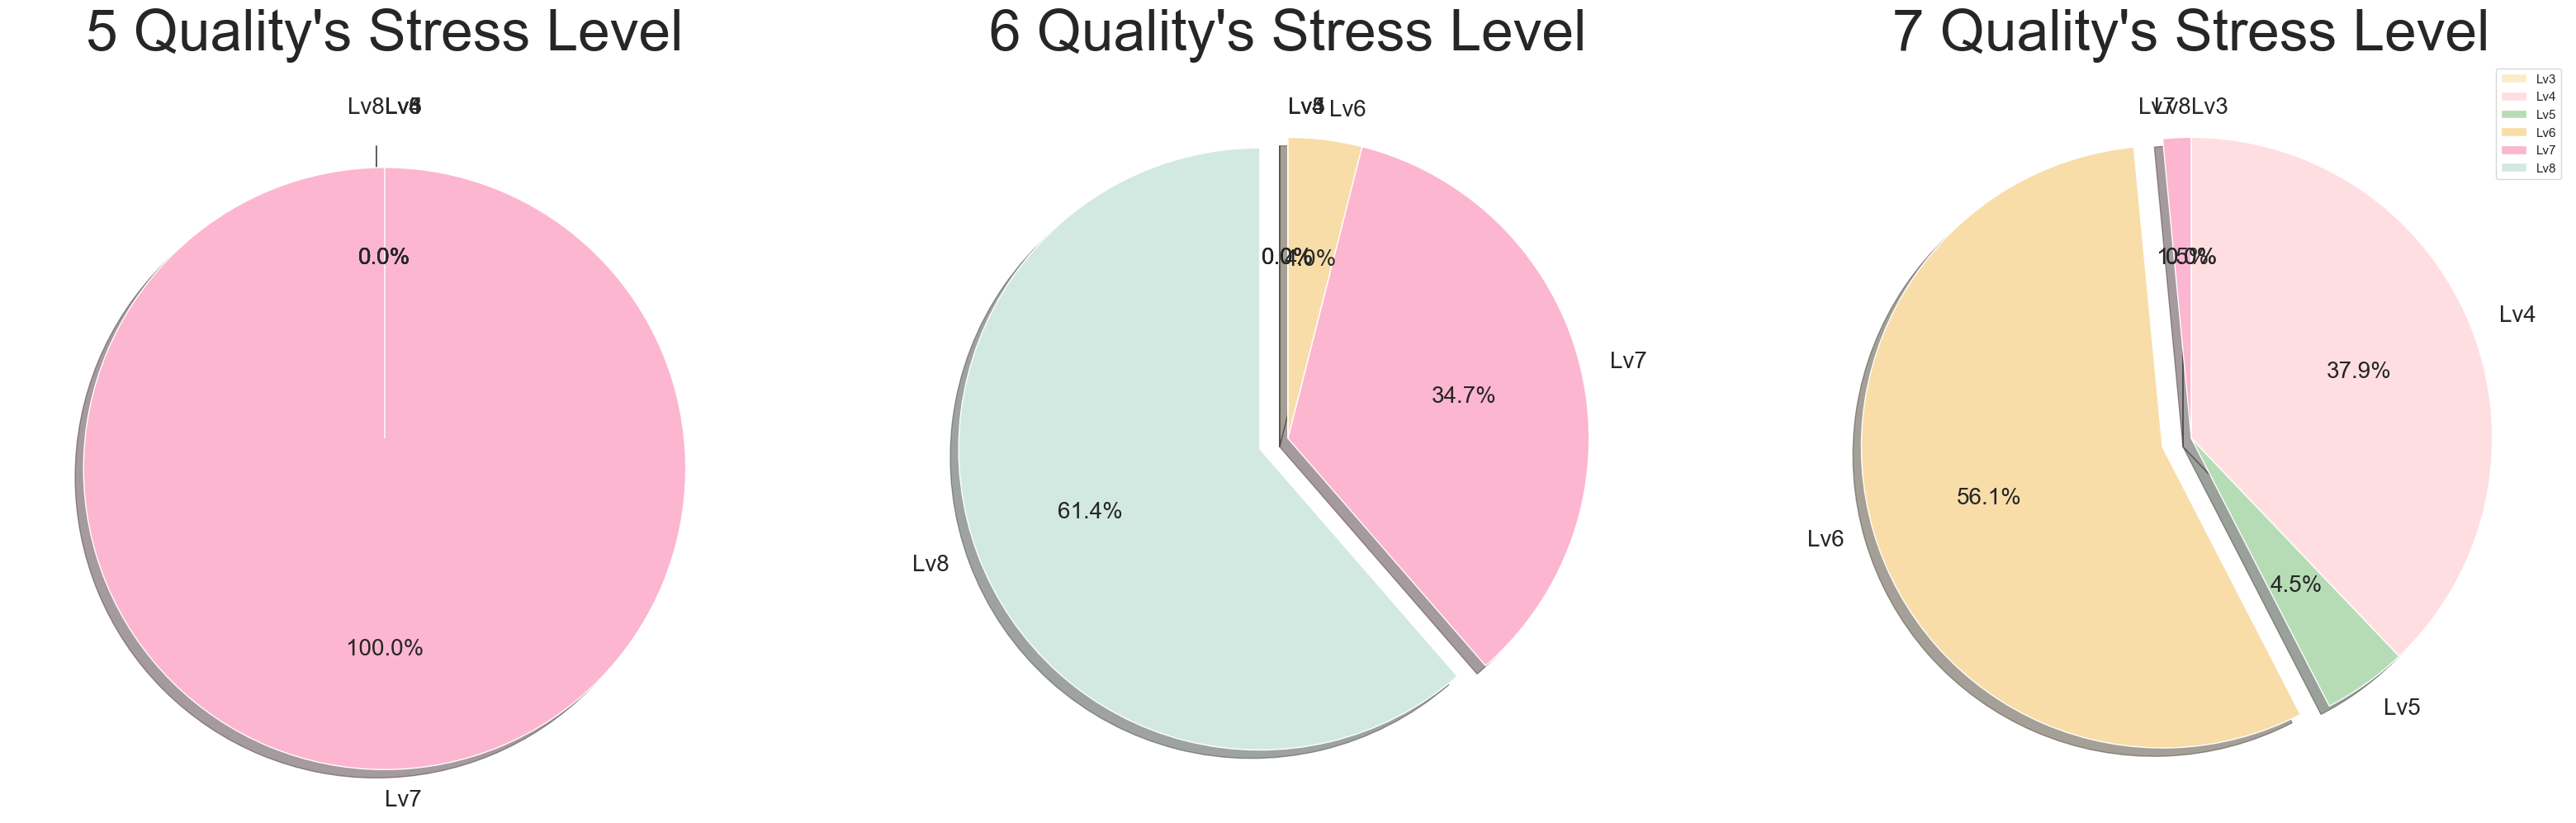

In [43]:
# pie chart를 통한 분포 확인(1)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (40, 40))


ax1.pie(quality5_result, labels = Stress_label, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_quality5, shadow=True, counterclock=False, textprops={'fontsize': 20}, colors=colors)
ax1.set_title("5 Quality's Stress Level", fontsize=50)

ax2.pie(quality6_result, labels = Stress_label, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_quality6, shadow=True, counterclock=False, textprops={'fontsize': 20}, colors=colors)
ax2.set_title("6 Quality's Stress Level", fontsize=50)

ax3.pie(quality7_result, labels = Stress_label, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_quality7, shadow=True, counterclock=False, textprops={'fontsize': 20}, colors=colors)
ax3.set_title("7 Quality's Stress Level", fontsize=50)

plt.legend()
plt.show()

- 수면의 질이 5인 사람들은 모두 스트레스 지수가 7레벨이다.
- 수면의 질이 6인 사람들 중 스트레스 지수 1순위는 8레벨로 61.4%이며, 2순위는 7레벨로 34.7%이다.
- 수면의 질이 7인 사람들 중 스트레스 지수 1순위는 6레벨로 56.1%이며, 2순위는 4레벨로 37.9%이다.

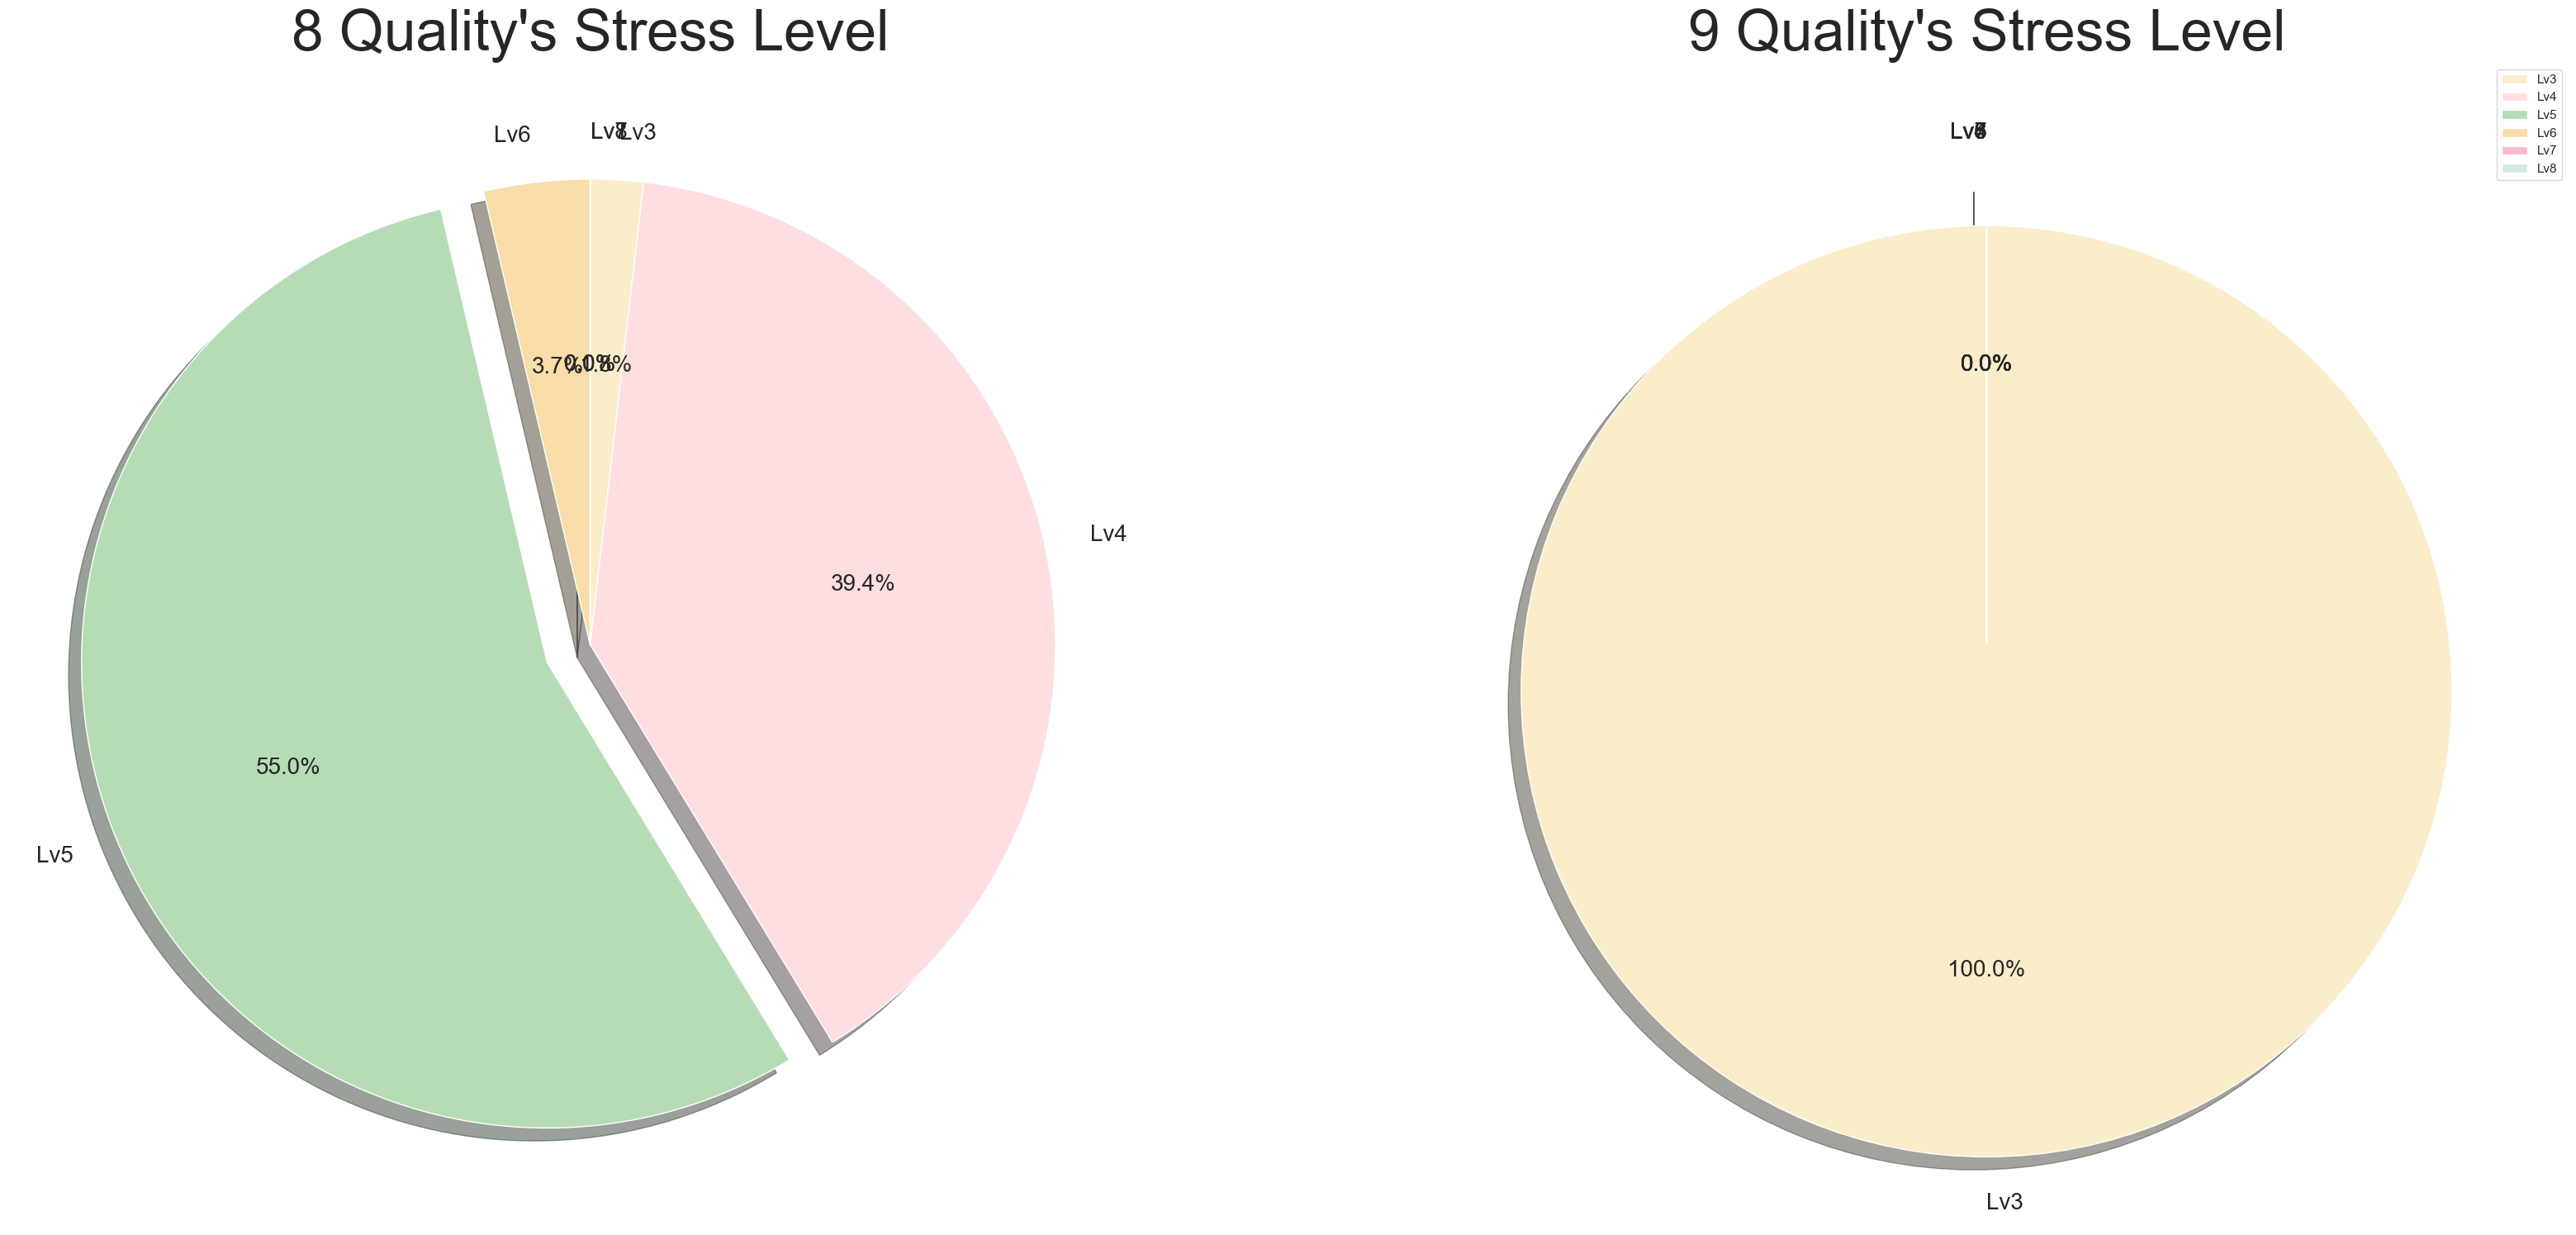

In [44]:
# pie chart를 통한 분포 확인(2)
fig, (ax4, ax5) = plt.subplots(1, 2, figsize = (40, 40))

ax4.pie(quality8_result, labels = Stress_label, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_quality8, shadow=True, counterclock=False, textprops={'fontsize': 20}, colors=colors)
ax4.set_title("8 Quality's Stress Level", fontsize=50)

ax5.pie(quality9_result, labels = Stress_label, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_quality9, shadow=True, counterclock=False, textprops={'fontsize': 20}, colors=colors)
ax5.set_title("9 Quality's Stress Level", fontsize=50)

plt.legend()
plt.show()

- 수면의 질이 8인 사람들 중 스트레스 지수 1순위는 5레벨 55.0%이며. 2순위는 4레벨로 39.4%이다.
- 수면의 질이 9인 사람들은 모두 스트레스 지수가 3레벨이다.

수면의 질이 스트레스 정도에 영향을 끼치는 것을 보여준다.

## 4-2. 수면 지속 시간, 수면의 질과 수면 장애 관계

### : 'Sleep Duration', 'Quality of Sleep' & 'Sleep Disorder'를 이용해 상관관계 파악

##### 1) str값을 가진 'BMI Category'와 'Sleep Disorder'를 'One-hot Encoding'을 이용해 관계 파악

In [45]:
# 'BMI Category'의 One-hot Encoding
dummy_BMI = pd.get_dummies(df[['BMI Category']])

dummy_BMI

,BMI Category_Normal,BMI Category_Overweight
0,0,1
1,1,0
3,0,1
4,1,0
5,0,1
...,...,...
368,0,1
370,1,0
371,0,1
372,1,0


In [46]:
# 'Sleep Disorder'의 One-hot Encoding
dummy_disorder = pd.get_dummies(df[['Sleep Disorder']])

dummy_disorder

,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,1,0,0
1,0,1,0
3,0,0,1
4,0,1,0
5,0,1,0
...,...,...,...
368,0,0,1
370,0,1,0
371,0,0,1
372,0,1,0


In [47]:
# 'BMI Category', 'Sleep Disorder' 열 삭제
df1 = df.drop(['BMI Category', 'Sleep Disorder'], axis = 1)

df1

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Quality
0,6.3,6,45,7,72,6000,6
1,7.7,8,90,5,70,8000,8
3,6.0,6,90,8,75,10000,6
4,7.4,8,60,5,68,8000,8
5,7.1,7,55,6,72,6000,7
...,...,...,...,...,...,...,...
368,6.1,6,90,8,75,10000,6
370,7.2,8,60,5,68,8000,8
371,8.1,9,75,3,68,7000,9
372,7.2,8,55,6,73,7300,8


In [48]:
BMI_SD = pd.concat([dummy_BMI, dummy_disorder], axis=1)

df_one = pd.concat([df1, BMI_SD], axis=1)

df_one

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Quality,BMI Category_Normal,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,6.3,6,45,7,72,6000,6,0,1,1,0,0
1,7.7,8,90,5,70,8000,8,1,0,0,1,0
3,6.0,6,90,8,75,10000,6,0,1,0,0,1
4,7.4,8,60,5,68,8000,8,1,0,0,1,0
5,7.1,7,55,6,72,6000,7,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
368,6.1,6,90,8,75,10000,6,0,1,0,0,1
370,7.2,8,60,5,68,8000,8,1,0,0,1,0
371,8.1,9,75,3,68,7000,9,0,1,0,0,1
372,7.2,8,55,6,73,7300,8,1,0,0,1,0


##### 2) Minkowski distance을 이용해  수면 건강이 가장 좋은 인물과 가장 안 좋은 인물 비교

In [49]:
#1차 거리 
np.linalg.norm(df_one.iloc[0] - df_one.iloc[1], ord=1)

2058.4

In [50]:
#2차 거리 
np.linalg.norm(df_one.iloc[0] - df_one.iloc[1], ord=2)

2000.5116745472894

In [51]:
#inf 거리 
np.linalg.norm(df_one.iloc[0] - df_one.iloc[1], ord=np.inf)

2000.0

#### [ 수면 건강 지표 ]
- 'Sleep Disorder'
- 'Stress Level'
- 'Quality of Sleep' 
- 'Sleep Duration'

In [52]:
# 'Sleep Disorder' 열에서 'None'인 value의 행만 추출
Sleep_best = df.loc[df['Sleep Disorder'] == 'None']

Sleep_best

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
1,7.7,8,90,5,Normal,70,8000,None,8
4,7.4,8,60,5,Normal,68,8000,None,8
5,7.1,7,55,6,Overweight,72,6000,None,7
7,7.5,8,60,5,Normal,70,8000,None,8
10,7.7,8,90,5,Normal,70,8000,None,8
...,...,...,...,...,...,...,...,...,...
364,6.1,6,30,8,Normal,70,8000,None,6
366,7.6,7,75,6,Normal,70,8000,None,7
370,7.2,8,60,5,Normal,68,8000,None,8
372,7.2,8,55,6,Normal,73,7300,None,8


In [53]:
# 'Stress Level' 열에서 '3'인 value의 행만 추출
Sleep_best = Sleep_best.loc[Sleep_best['Stress Level'] == 3]

Sleep_best

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
27,8.1,9,75,3,Overweight,68,7000,None,9
134,8.2,9,90,3,Normal,65,10000,None,9
135,7.5,8,45,3,Normal,70,8000,None,8
155,8.3,9,30,3,Normal,65,5000,None,9
188,8.5,9,30,3,Normal,65,5000,None,9
214,7.5,8,45,3,Normal,70,8000,None,8
267,8.0,9,80,3,Normal,67,7500,None,9
319,8.4,9,30,3,Normal,65,5000,None,9
328,8.4,9,30,3,Normal,65,5000,None,9
345,8.0,9,75,3,Overweight,68,7000,None,9


In [54]:
# 'Quality of Sleep' 열에서 '9'인 value의 행만 추출
Sleep_best = Sleep_best.loc[Sleep_best['Quality of Sleep'] == 9]

Sleep_best

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
27,8.1,9,75,3,Overweight,68,7000,None,9
134,8.2,9,90,3,Normal,65,10000,None,9
155,8.3,9,30,3,Normal,65,5000,None,9
188,8.5,9,30,3,Normal,65,5000,None,9
267,8.0,9,80,3,Normal,67,7500,None,9
319,8.4,9,30,3,Normal,65,5000,None,9
328,8.4,9,30,3,Normal,65,5000,None,9
345,8.0,9,75,3,Overweight,68,7000,None,9
349,8.0,9,80,3,Normal,67,7500,None,9
358,8.1,9,75,3,Overweight,68,7000,None,9


In [55]:
# 수면 건강이 가장 좋은 인물 확인
Sleep_best.loc[Sleep_best['Sleep Duration'].idxmax()]

Sleep Duration                8.5
Quality of Sleep                9
Physical Activity Level        30
Stress Level                    3
BMI Category               Normal
Heart Rate                     65
Daily Steps                  5000
Sleep Disorder               None
Quality                         9
Name: 188, dtype: object

In [56]:
# 수면 건강이 가장 좋은 인물과 가장 거리가 먼 인물은 몇 번째일까? 
df_one = df_one.astype(float)

difference = df_one.loc[188] - df_one
distance_vector = np.linalg.norm(df_one.loc[188] - df_one.loc[0:], axis=1, ord=1)

sleep_worst = np.argmax(distance_vector)

print(sleep_worst)

56


In [57]:
# 수면 건강이 가장 좋은 인물과 가장 거리가 먼 인물 비교
df_difference = pd.concat([df_one.loc[188], df_one.iloc[sleep_worst]], axis=1)
df_difference.columns = ['Best Sleeper', 'Worst Sleeper']
df_difference

,Best Sleeper,Worst Sleeper
Sleep Duration,8.5,5.9
Quality of Sleep,9.0,6.0
Physical Activity Level,30.0,90.0
Stress Level,3.0,8.0
Heart Rate,65.0,75.0
Daily Steps,5000.0,10000.0
Quality,9.0,6.0
BMI Category_Normal,1.0,0.0
BMI Category_Overweight,0.0,1.0
Sleep Disorder_Insomnia,0.0,0.0


In [58]:
# 수면 건강이 가장 좋은 인물과 안 좋은 인물의 1차 거리
np.linalg.norm(df_one.loc[188] - df_one.iloc[sleep_worst], ord=1)

5087.6

[ 수면 건강이 가장 좋은 인물 ]
- 수면 장애가 없으며, 최솟값 혹은 최댓값만을 갖는다.
- 추가적인 정보로는, 정상 체중이며 심박수가 '65'로 낮은 편에 속한다.

[ 수면 건강이 가장 안 좋은 인물 ]
- '수면 무호흡증'이라는 수면 장애가 있으며, 비교적 적은 수면 지속 시간, 낮은 수면의 질, 높은 스트레스 지수의 값을 갖는다.
- 추가적인 정보로는, 과체중이며 심박수가 '75'로 비교적 높다.

##### 3) 'Sleep Disorder'과 'Sleep Duration', 'Quality of Sleep' 관계 시각화

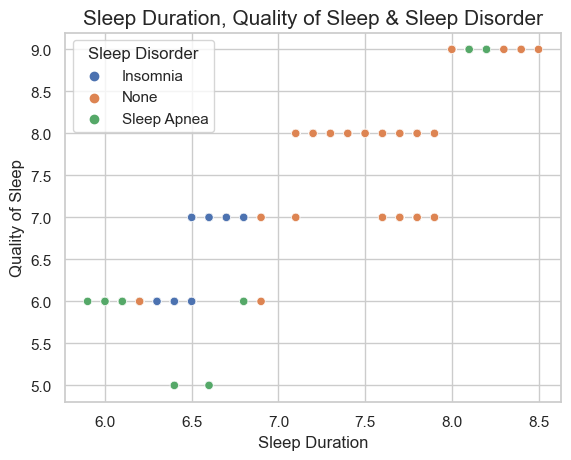

In [59]:
a1 = sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df, hue='Sleep Disorder')
a1.set_title("Sleep Duration, Quality of Sleep & Sleep Disorder", fontsize = 15)

plt.show()

- 보통 수면 장애가 있는 사람들은 수면 장애가 없는 사람들보다 비교적 수면 지속 시간이 짧고 수면의 질이 낮다.
- 수면 지속 시간이 길고 수면의 질이 높더라도 '수면 무호흡증'이라는 수면 장애가 있을 수 있다.

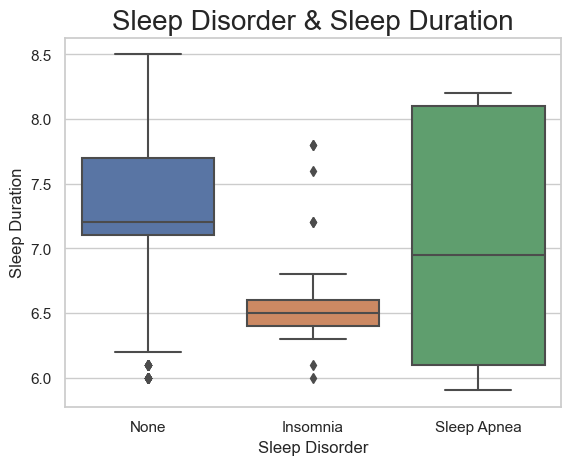

In [60]:
# 'Sleep Disorder' 별로 'Sleep Duration' 관계
a2 = sns.boxplot(y = 'Sleep Duration', x = 'Sleep Disorder', data = df, order = ['None', 'Insomnia', 'Sleep Apnea'])
a2.set_title("Sleep Disorder & Sleep Duration", fontsize = 20)

plt.show()

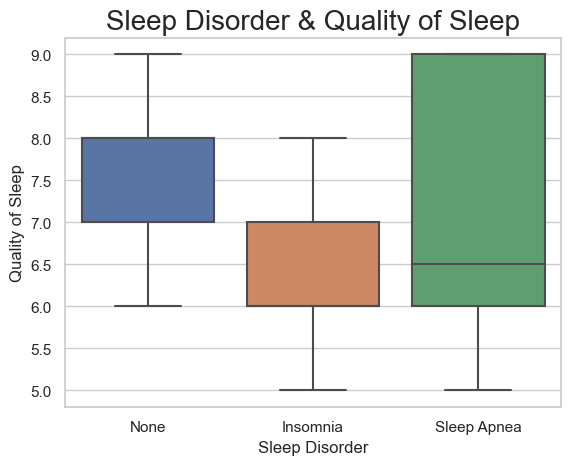

In [61]:
# 'Sleep Disorder' 별로 'Quality of Sleep' 관계
a3 = sns.boxplot(y = 'Quality of Sleep', x = 'Sleep Disorder', data = df, order = ['None', 'Insomnia', 'Sleep Apnea'])
a3.set_title("Sleep Disorder & Quality of Sleep", fontsize = 20)

plt.show()

- 수면 장애가 없는 사람들은 불면증이 있는 사람들보다 비교적 수면 지속 시간이 길고 수면의 질이 높다.
- 불면증이 있는 사람들 대부분은 수면 지속 시간이 짧고 수면의 질이 낮다.
- 수면 무호흡증이 있는 사람들은 수면 지속 시간, 수면의 질과 상관 없이 나타난다.

##### 4) 'Stress Level'과 'Sleep Disorder' 유무 관계 시각화

In [62]:
# 'Sleep Disorder' 열에서 'None'이 아닌 value 값의 행만 추출
Disorder_df = df.loc[df['Sleep Disorder'] != 'None']

Disorder_df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
0,6.3,6,45,7,Overweight,72,6000,Insomnia,6
3,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,6
6,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,9
8,7.7,7,75,6,Normal,70,8000,Sleep Apnea,7
11,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,9
...,...,...,...,...,...,...,...,...,...
356,6.6,7,45,4,Overweight,65,6000,Insomnia,7
365,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,9
367,6.1,6,90,8,Overweight,75,10000,Sleep Apnea,6
368,6.1,6,90,8,Overweight,75,10000,Sleep Apnea,6


In [63]:
# 'Sleep Disorder' 열에서 'None' value 값의 행만 추출
None_Disorder_df = df.loc[df['Sleep Disorder'] == 'None']

None_Disorder_df

,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Quality
1,7.7,8,90,5,Normal,70,8000,None,8
4,7.4,8,60,5,Normal,68,8000,None,8
5,7.1,7,55,6,Overweight,72,6000,None,7
7,7.5,8,60,5,Normal,70,8000,None,8
10,7.7,8,90,5,Normal,70,8000,None,8
...,...,...,...,...,...,...,...,...,...
364,6.1,6,30,8,Normal,70,8000,None,6
366,7.6,7,75,6,Normal,70,8000,None,7
370,7.2,8,60,5,Normal,68,8000,None,8
372,7.2,8,55,6,Normal,73,7300,None,8


In [64]:
# 수면 장애가 있는 사람의 'Stress Level' 단계 별 개수 카운트
Disorder_df['Stress Level'].value_counts().sort_index()

3    28
4    25
5     6
6     3
7    37
8    29
Name: Stress Level, dtype: int64

In [65]:
# 수면 장애가 없는 사람의 'Stress Level' 단계 별 개수 카운트
None_Disorder_df['Stress Level'].value_counts().sort_index()

3    12
4    43
5    57
6    42
7     3
8    33
Name: Stress Level, dtype: int64

In [66]:
# 수면 장애가 있는 사람과 없는 사람의 'Stress Level' 비교
Stress_name = ['Lv3', 'Lv4', 'Lv5', 'Lv6', 'Lv7', 'Lv8']
Disorder_result = [28, 25, 6, 3, 37, 29]
None_Disorder_result = [12, 43, 57, 42, 3, 33]

explode_Disorder = [0, 0, 0, 0, 0.1, 0]
explode_None = [0, 0, 0.1, 0, 0, 0]

colors = ['#FBEDC9', '#FFDEE1', '#B6DCB6', '#F8DDA9', '#FCB6D0', '#D2E9E1']

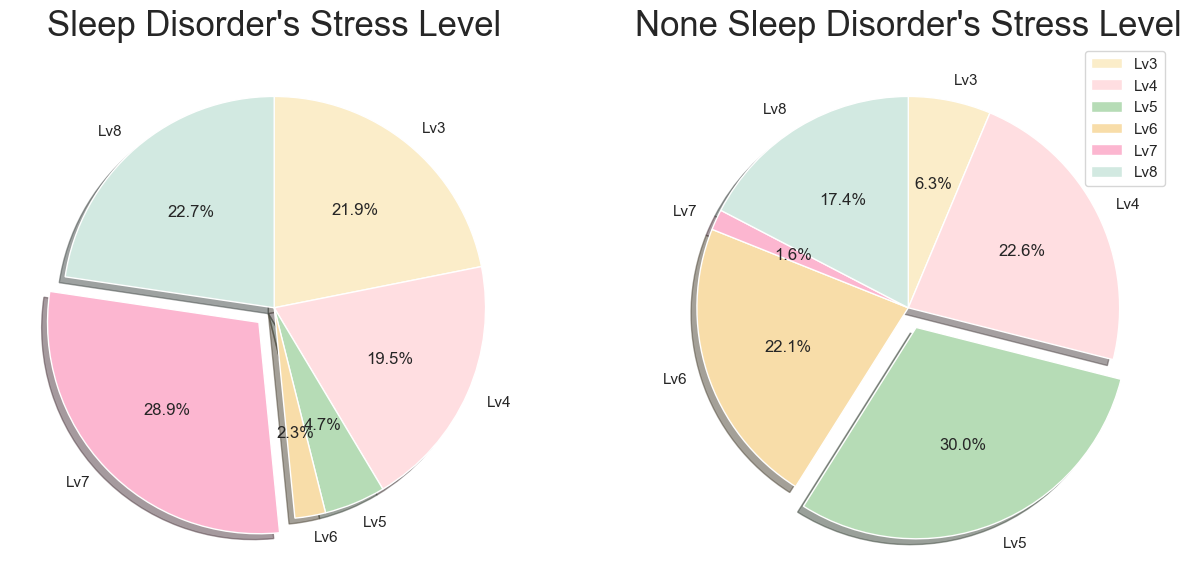

In [67]:
# pie chart를 통한 분포 확인
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))


ax1.pie(Disorder_result, labels = Stress_name, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_Disorder, shadow=True, counterclock=False, colors=colors)
ax1.set_title("Sleep Disorder's Stress Level", fontsize=25)


ax2.pie(None_Disorder_result, labels = Stress_name, autopct = '%0.1f%%', 
        startangle = 90, explode = explode_None, shadow=True, counterclock=False, colors=colors)
ax2.set_title("None Sleep Disorder's Stress Level", fontsize=25)

plt.legend()
plt.show()

- 수면 장애가 있는 사람들 중 스트레스 지수 1순위는 7레벨로 28.9%이며, 2순위는 8레벨로 22.7%를 차지한다.
- 수면 장애가 없는 사람들 중 스트레스 지수 1순위는 5레벨로 30.0%이며, 2순위는 4레벨로 22.6%를 차지한다.

수면 장애 유무가 스트레스 정도에 영향을 끼치는 것을 보여준다.

# 5. 신체 건강이 수면 건강에 주는 영향

## 5-1 신체 활동과 수면 건강 관계

##### 1) Permutation Test를 통해  'BMI Category'와 'Daily Steps'의 가설 검정

<가설검정>

귀무가설 : 과체중과 보통 체중의 하루 걸음수는 차이가 많이 난다.

대립가설 : 과체중과 보통 체중의 하루 걸음수 차이가 비슷하다.

두 집단의 평균 차이 : 161.2345879299155
P-value: 0.1049


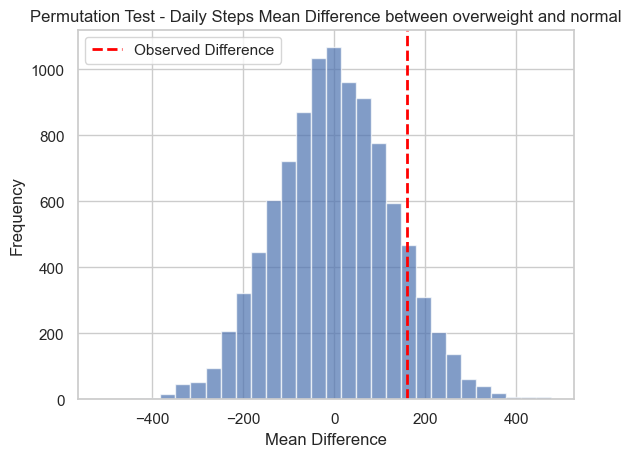

95% Confidence Interval: [-244.02173913043498, 253.26086956521704]


In [68]:
# 'Overweight'와 'Normal' 집단의 'Daily Steps' 데이터 불러오기
Overweight = df[df['BMI Category'] == 'Overweight']['Daily Steps']
Normal = df[df['BMI Category'] == 'Normal']['Daily Steps']


# 원래의 평균 차이 계산
obs_diff = np.mean(Normal) - np.mean(Overweight)

# Permutation Test
n_permutations = 10000
count = 0
combined = np.concatenate((Overweight, Normal))

permuted_diffs = []
for _ in range(n_permutations):
    permuted_data = np.random.permutation(combined)
    permuted_Normal = permuted_data[:len(Normal)]
    permuted_Overweight = permuted_data[len(Overweight):]

    permuted_diff = np.mean(permuted_Normal) - np.mean(permuted_Overweight)
    permuted_diffs.append(permuted_diff)

    if permuted_diff > obs_diff:
        count += 1

p_value = count / n_permutations

# 결과 출력
print(f"두 집단의 평균 차이 : {obs_diff}")
print(f"P-value: {p_value}")

# Histogram 그리기
plt.hist(permuted_diffs, bins=30, alpha=0.7)
plt.axvline(obs_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test - Daily Steps Mean Difference between overweight and normal')
plt.legend()
plt.show()

# 95% Confidence Interval
confidence_level = 0.95
lower_p = (1 - confidence_level) / 2
upper_p = 1 - lower_p
lower_bound = np.percentile(permuted_diffs, lower_p * 100)
upper_bound = np.percentile(permuted_diffs, upper_p * 100)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

과체중 사람들이 하루에 걷는 걸음수의 평균과 보통 체중 사람들이 하루에 걷는 걸음수의 평균의 차가 161.23으로 큰 차이를 보인다. 이 평균 차가 유의미한지 이 두 집단의 순열 검정을 진행한 결과, p-value가 0.1로 유의수준 0.05보다 더 크므로 귀무가설을 기각하지 않는다. 즉, 과체중과 보통 체중 집단 간의 걸음수 차이가 많이 난다.

##### 2) Boxplot을 이용해 순열 검정한 결과 시각화

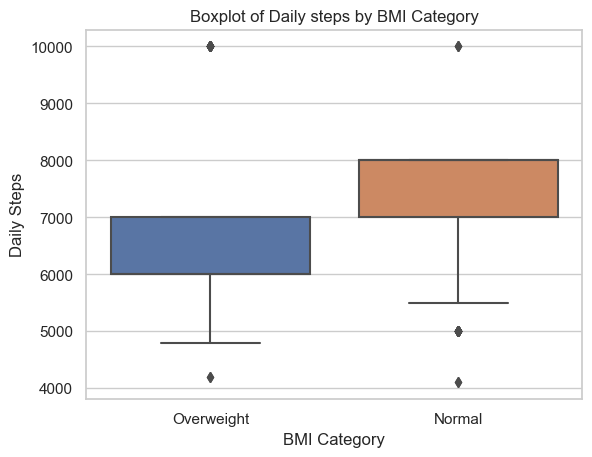

In [69]:
# 'BMI Category' 별 'Daily Steps' 비교
sns.boxplot(x = 'BMI Category', y = 'Daily Steps', data = df)
plt.title('Boxplot of Daily steps by BMI Category')
plt.show()

##### 3) Violinplot을 이용해 'BMI Category'와 수면 건강과의 관계 시각화

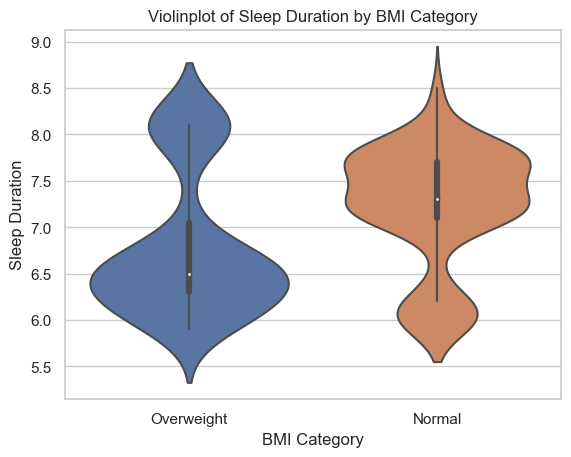

In [70]:
# 'BMI Category' 별 'Sleep Duration' 비교
sns.violinplot(x = 'BMI Category', y = 'Sleep Duration', data = df)
plt.title('Violinplot of Sleep Duration by BMI Category')
plt.show()

BMI가 낮은 사람일수록 활동량이 많고 수면 지속 시간이 길다는 결과를 얻었다.

따라서 활동량이 많고 BMI가 낮은 건강한 사람일수록 수면 건강도 좋다는 사실을 확인했다.

## 5-2. BMI와 수면 장애 관계

In [71]:
# 'Normal'과 'Overweight'에 해당하는 인원 수 카운트
df['BMI Category'].value_counts()

Normal        184
Overweight    134
Name: BMI Category, dtype: int64

##### 1) str값을 가진 'BMI Category'와 'Sleep Disorder'를 One-hot Encoding을 이용해 상관관계(corr, cov) 파악

In [72]:
# 'BMI Category'의 One-hot Encoding
dummy_BMI = pd.get_dummies(df[['BMI Category']])
dummy_BMI

,BMI Category_Normal,BMI Category_Overweight
0,0,1
1,1,0
3,0,1
4,1,0
5,0,1
...,...,...
368,0,1
370,1,0
371,0,1
372,1,0


In [73]:
# 'Sleep Disorder'의 One-hot Encoding
dummy_disorder = pd.get_dummies(df[['Sleep Disorder']])
dummy_disorder

,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,1,0,0
1,0,1,0
3,0,0,1
4,0,1,0
5,0,1,0
...,...,...,...
368,0,0,1
370,0,1,0
371,0,0,1
372,0,1,0


In [74]:
onehotDf = pd.concat([dummy_BMI, dummy_disorder], axis=1)
corr = (onehotDf.corr()).iloc[0:2,2:5]
corr.style.background_gradient(cmap='coolwarm')

,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
BMI Category_Normal,-0.477018,0.792978,-0.492902
BMI Category_Overweight,0.477018,-0.792978,0.492902


In [75]:
cov = onehotDf.cov()
cov

,BMI Category_Normal,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
BMI Category_Normal,0.244589,-0.244589,-0.094736,0.192627,-0.097891
BMI Category_Overweight,-0.244589,0.244589,0.094736,-0.192627,0.097891
Sleep Disorder_Insomnia,-0.094736,0.094736,0.161260,-0.120628,-0.040633
Sleep Disorder_None,0.192627,-0.192627,-0.120628,0.241255,-0.120628
Sleep Disorder_Sleep Apnea,-0.097891,0.097891,-0.040633,-0.120628,0.161260


- 보통 체중인 경우 '불면증'과 '수면 무호흡증' 데이터와 음의 상관관계를 보이고 '증상 없음'에서 양의 상관관계를 보인다.
- 과체중인 경우  '불면증'과 '수면 무호흡증'에서 양의 상관관계를 보이고 '증상 없음'에서 음의 상관관계를 보인다.

따라서, BMI 값이 커질수록 수면 장애의 발병률이 커진다는 사실을 확인할 수 있다. 

##### 2) 시각화를 통해 위에서 파악한 상관관계가 옳은지 확인

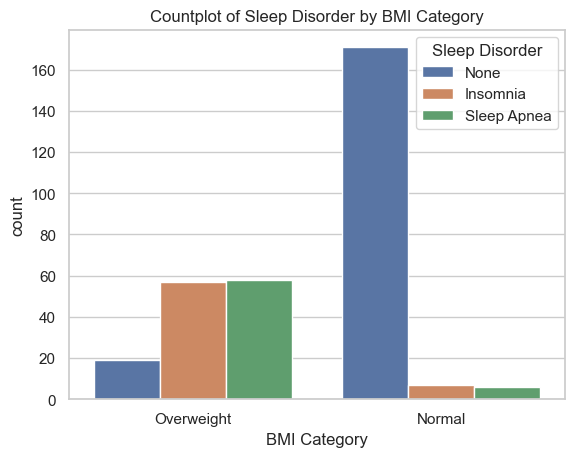

In [76]:
# 'BMI Category' 별 'Sleep Disorder' 시각화
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder',hue_order=['None', 'Insomnia', 'Sleep Apnea'], data=df)
plt.title('Countplot of Sleep Disorder by BMI Category')
plt.show()

시각화를 통해 과체중이 보통 체중에 비해 불면증이나 수면 무호흡증을 가진 비율이 더 높음을 확인할 수 있다. 

# 6. 결론

### 1. 수면 건강에 영향을 주는 요인들


#### 1-1. 수면 지속 시간, 수면의 질과 스트레스 지수 관계
- 수면 지속 시간과 수면의 질 간 Cosine Similarity 값을 계산한 결과, 값이 1에 매우 가까우므로 수면 지속 시간과 수면의 질은 유사한 값을 가진다.
- 수면 지속 시간, 수면의 질 & 스트레스 지수 간 Correlation을 통해, 수면 지속 시간보다 수면의 질이 스트레스 지수와 더 강한 반비례 관계를 나타냄을 확인했다.
- 시각화를 통해 수면 지속 시간이 길수록, 수면의 질이 높을수록 스트레스 지수가 낮다는 사실을 확인했다.
- 수면의 질 범주별 스트레스 지수를 비교하여 수면의 질 변수가 스트레스 지수에 미치는 영향이 수면 지속 시간보다 더 강하다는 사실을 확인했다. 따라서, 앞서 구한 Correlation가 옳다고 판단할 수 있다.

#### 1-2. 수면 지속 시간, 수면의 질과 수면 장애 관계
- Minkowski distance을 이용해 수면 건강이 가장 좋은 인물과 안 좋은 인물을 추출했을 때, 모든 열에서 극명한 차이를 확인했다.
- 수면 장애가 있는 사람들은 비교적 수면 지속 시간이 짧고 수면의 질이 낮으며, 수면 장애가 없는 사람들은 비교적 수면 지속 시간이 길고 수면의 질이 높다. 또한, 수면 무호흡증이 있는 사람들은 수면 지속 시간, 수면의 질과 상관없이 나타나는 것을 scatterplot과 boxplot을 통해 확인했다.
- pie chart를 이용해 수면 장애가 있는 사람들의 스트레스 지수 1순위는 7레벨이며 2순위는 8레벨이고, 수면 장애가 없는 사람들의 스트레스 지수 1순위는 5레벨이며 2순위는 4레벨의 결과를 분포로 나타냈다. 이를 통해, 수면 장애 유무가 스트레스 정도에 영향을 크게 미친다는 것을 확인했다.

<strong> [ 결론_1 ] </strong> 

1. 수면 지속 시간이 길고 수면의 질이 높을수록 '스트레스 지수'가 낮다.
2. 수면 지속 시간이 길고 수면의 질이 높을수록 '수면 장애'가 발병할 확률이 낮다.


=> 따라서, 스트레스 지수가 낮을수록 수면 장애의 발병률이 낮다는 사실을 확인했다.


### 2. 신체 건강이 수면 건강에 주는 영향 


#### 2-1. 신체 활동과 수면
- 귀무가설을 '과체중과 보통 체중의 하루 걸음수가 차이가 많이 난다.'라고 설정한 후 permutation test한 결과, p-value가 0.1035로 유의수준 0.05 보다 크기 때문에 귀무가설을 기각한다. 따라서, 과체중과 보통 체중의 하루 걸음수의 차이가 크다는 것을 확인할 수 있다. 
- 시각화를 통해 BMI 지수가 높을수록 수면 지속 시간이 짧아짐을 확인했다. 

#### 2-2. BMI와 수면 장애 관계
- One-hot Encoding을 이용해 correlation과 covariance를 구한 결과 BMI 높은 사람(과체중)이 수면 장애 발생과 양의 상관관계를 가지고, BMI가 낮은 사람(보통 체중)은 수면 장애 발생과 음의 상관관계를 가진다는 결과를 도출했다.  
- BMI에 따른 수면 장애 발생을 시각화하여 BMI가 높을수록 수면 장애의 발병률이 높아짐을 확인했다. 

<strong> [ 결론_2 ] </strong> 

1. 하루 활동량이 적은 사람은 BMI 수치가 높다. 
2. BMI 수치가 높을수록 수면 장애를 가질 확률이 높다. 


=> 하루 활동량이 적고 BMI 수치가 높은 상대적으로 건강하지 않은 사람은 수면 지속 시간이 짧고 수면 장애를 가질 확률이 높아 수면 건강이 좋지 않음을 확인했다. 